# Applied Data Analysis — Homework 5

Import common libraries

In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from os import path
from wordcloud import WordCloud
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

import pycountry
import itertools

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(itertools.islice(iterable, n))

from nltk.corpus import opinion_lexicon
from nltk.sentiment import SentimentIntensityAnalyzer

import matplotlib
from sklearn import preprocessing


from gensim import corpora

## Task 1

> Generate a word cloud based on the raw corpus -- I recommend you to use the [Python word_cloud library](https://github.com/amueller/word_cloud).
With the help of `nltk` (already available in your Anaconda environment), implement a standard text pre-processing 
pipeline (e.g., tokenization, stopword removal, stemming, etc.) and generate a new word cloud. Discuss briefly the pros and
cons (if any) of the two word clouds you generated.

In [2]:
# Read the whole text.
df = pd.read_csv(path.join('hillary-clinton-emails', 'emails.csv'))
df.sample(5)

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
1418,1419,C05761131,STEINBERG,H2,"Abedin, Huma",81.0,2009-05-02T04:00:00+00:00,2015-06-30T04:00:00+00:00,DOCUMENTS/HRCAll_1_1-29_JuneWEB/20_21_22/DOC_0...,F-2014-20439,...,NaN,NaN,NaN,NaN,F-2014-20439,C05761131,06/30/2015,RELEASE IN PART,"Abedin, Huma <AbedinH@state.gov>\r\nSaturday, ...",UNCLASSIFIED U.S. Department of State Case No....
7767,7768,C05776480,LATEST CON'T,H,"Sullivan, Jacob J",87.0,2010-12-02T05:00:00+00:00,2015-08-31T04:00:00+00:00,DOCUMENTS/HRCEmail_August_Web/IPS-0111/DOC_0C0...,F-2014-20439,...,NaN,"Sullivan, Jacob J <Sullivann@state.gov>",NaN,"Thursday, December 2, 2010 7:09 AM",F-2014-20439,C05776480,08/31/2015,RELEASE IN FULL,Fyi,UNCLASSIFIED U.S. Department of State Case No....
566,567,C05758984,PALAU OFFENDED BY US POSITIONS,sullivanjj@state.gov,H,80.0,2009-07-12T04:00:00+00:00,2015-06-30T04:00:00+00:00,DOCUMENTS/HRCAll_1_1-29_JuneWEB/2_3_4/DOC_0C05...,F-2014-20439,...,'sullivanu@state.gov.,H <hrod17@clintonemail.com>,NaN,"Sunday, July 12, 2009 6:56 PM",F-2014-20439,C05758984,06/30/2015,RELEASE IN PART,"Jake---Pls review, do some recon outreach and ...",UNCLASSIFIED U.S. Department of State Case No....
4437,4438,C05768038,HOW LONG HBJ MTG GO?,H,"Abedin, Huma",81.0,2010-04-01T04:00:00+00:00,2015-08-31T04:00:00+00:00,DOCUMENTS/HRCEmail_August_Web/IPS-0073/DOC_0C0...,F-2014-20439,...,NaN,"Abedin, Huma <AbedinH@state.gov>",NaN,"Thursday, April 1, 2010 5:36 PM",F-2014-20439,C05768038,08/31/2015,RELEASE IN PART,NaN,UNCLASSIFIED U.S. Department of State Case No....
3663,3664,C05766505,A COUPLE OF POWERFUL QUOTES FROM FOREIGN MEDIA...,H,McHaleJA@state.gov,105.0,2010-01-28T05:00:00+00:00,2015-08-31T04:00:00+00:00,DOCUMENTS/HRCEmail_August_Web/IPS-0061/DOC_0C0...,F-2014-20439,...,"H; Burns, William J; Mills, Cheryl D; Smith, D...","McHale, Judith A <McHaleJA@state.gov>",NaN,"Thursday, January 28, 2010 5:07 AM",F-2014-20439,C05766505,08/31/2015,RELEASE IN FULL,Our Posts at work.,UNCLASSIFIED U.S. Department of State Case No....


In [3]:
len(df.index)

7945

In [4]:
df['ExtractedBodyText'].count()

6742

Based on above computations we can see thats ExtractedBodyText is missing in about 1200 cases. Anyway, for the sake of simplicity we have decided to use this column instead of RawText which would require a big amount of preprocessing.

(-0.5, 399.5, 199.5, -0.5)

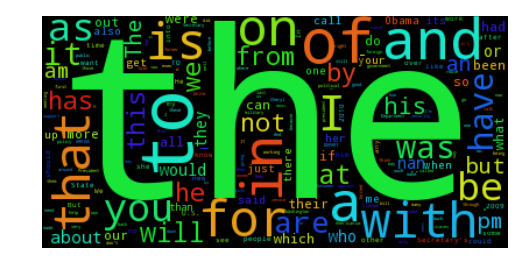

In [61]:
df['ExtractedBodyText'] = df['ExtractedBodyText'].apply(str)

from collections import Counter
result = Counter(" ".join(df['ExtractedBodyText'].tolist()).split(" ")).most_common()
wordcloud = WordCloud().generate_from_frequencies(result)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")

We have generated wordcloud on the word frequencies form raw data witouth any preprocessing. Unsurprisingly, the word cloud consists of the most common words in English, be it articles, prepositions, pronouns and forms of verb is.

(-0.5, 399.5, 199.5, -0.5)

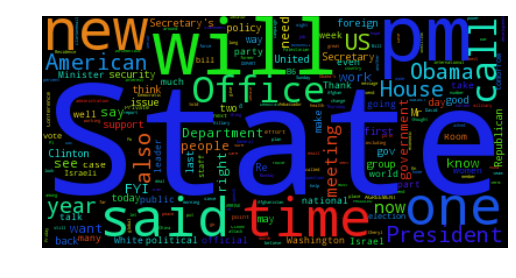

In [6]:
text = df['ExtractedBodyText'].str.cat(sep=' ')
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")

Here, we have generated word cloud from the raw text, but we let the worldcloud library to count the frequencies itself. The library has its own set of preprocessing steps such as removing stopwords, numbers as well as simple tokenization. Therefore, we can see that most of the basic common words in English language got filtered out.

#### Our  text pre-processing pipeline

Internet sources (http://www.nytimes.com/2008/12/03/us/politics/03clinton.html?_r=0) claim that Hillary Rodham Clinton is monolingual, i.e. she speaks only English. That is why we assume that all the emails written to and by her are in English.

In [7]:
tokens = nltk.word_tokenize(text)
tokens[:25]

['B6',
 'Thursday',
 ',',
 'March',
 '3',
 ',',
 '2011',
 '9:45',
 'PM',
 'H',
 ':',
 'Latest',
 'How',
 'Syria',
 'is',
 'aiding',
 'Qaddafi',
 'and',
 'more',
 '...',
 'Sid',
 'hrc',
 'memo',
 'syria',
 'aiding']

In [8]:
#remove punctutation
tokens_wo_punctuation = [token for token in tokens if token not in ['.', ',', '!', '?', ':', '-', '&', '<', '>', ';', '"', '@', '(', ')', "''", '``', '—', '--', "'", '[', ']', '•', '%', '...', '-•-', '-^']]
tokens_wo_punctuation[:25]

['B6',
 'Thursday',
 'March',
 '3',
 '2011',
 '9:45',
 'PM',
 'H',
 'Latest',
 'How',
 'Syria',
 'is',
 'aiding',
 'Qaddafi',
 'and',
 'more',
 'Sid',
 'hrc',
 'memo',
 'syria',
 'aiding',
 'libya',
 '030311.docx',
 'hrc',
 'memo']

In [9]:
my_stopwords = stopwords.words('english')
my_stopwords.extend(["n't", 'pm'])
tokens_wo_stopwords = [token for token in tokens_wo_punctuation if token.lower() not in my_stopwords]
tokens_wo_stopwords[:25]

['B6',
 'Thursday',
 'March',
 '3',
 '2011',
 '9:45',
 'H',
 'Latest',
 'Syria',
 'aiding',
 'Qaddafi',
 'Sid',
 'hrc',
 'memo',
 'syria',
 'aiding',
 'libya',
 '030311.docx',
 'hrc',
 'memo',
 'syria',
 'aiding',
 'libya',
 '030311.docx',
 'March']

In [10]:
# part of speech for token
tokens_tagged = nltk.pos_tag(tokens_wo_stopwords)
tokens_tagged[:25]

[('B6', 'NNP'),
 ('Thursday', 'NNP'),
 ('March', 'NNP'),
 ('3', 'CD'),
 ('2011', 'CD'),
 ('9:45', 'CD'),
 ('H', 'NNP'),
 ('Latest', 'NNP'),
 ('Syria', 'NNP'),
 ('aiding', 'VBG'),
 ('Qaddafi', 'NNP'),
 ('Sid', 'NNP'),
 ('hrc', 'NN'),
 ('memo', 'NN'),
 ('syria', 'NN'),
 ('aiding', 'VBG'),
 ('libya', 'JJ'),
 ('030311.docx', 'CD'),
 ('hrc', 'NN'),
 ('memo', 'NN'),
 ('syria', 'NN'),
 ('aiding', 'VBG'),
 ('libya', 'JJ'),
 ('030311.docx', 'CD'),
 ('March', 'NNP')]

We do not use stemming in this part of homework as we are interested in whole words. 

In [11]:
# mapping from POS_TAG to WordNet's part of speech (taken from http://stackoverflow.com/questions/15586721/wordnet-lemmatization-and-pos-tagging-in-python)
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [12]:
lmtzr = WordNetLemmatizer()
def lemmatize(token, treebank_tag):
    wordnet_pos = get_wordnet_pos(treebank_tag)
    if wordnet_pos:
        return lmtzr.lemmatize(token, wordnet_pos), wordnet_pos
    else:
        return token, wordnet_pos

In [13]:
# lemmed_tokens = [lemmatize(token, part_of_speech) for token, part_of_speech in tokens_tagged]
# lemmatize and filter out only parts of speech we are interested in (NOUNS, VERBS, ADJECTIVES, ADVERBS)
lemmed_tokens  = [lemmed_token for lemmed_token, wordnet_pos in (lemmatize(token, part_of_speech) for token, part_of_speech in tokens_tagged) if wordnet_pos is not None]
lemmed_tokens[:25]

['B6',
 'Thursday',
 'March',
 'H',
 'Latest',
 'Syria',
 'aid',
 'Qaddafi',
 'Sid',
 'hrc',
 'memo',
 'syria',
 'aid',
 'libya',
 'hrc',
 'memo',
 'syria',
 'aid',
 'libya',
 'March',
 'Hillary',
 'Thx',
 'H',
 'hrod17',
 'clintonemail.com']

We have moved normalization to the end of the pipeline because some of the methods used before are sensitive to dots and case. For example, if we used normalization on "U.S.", "u.s.", "US" all would result in "us", then nltk.pos_tag([token,]) method would mark it as personal pronoun (PRP) instead of noun (N*) and thus it would get filtered out. "u.s." gets tagged as Verb, non-3rd person singular present (VBP) which is incorect, but as we do not filter out verbs it does not cause any problems to our computations.

In [14]:
nltk.pos_tag(['U.S.', 'US', 'u.s.', 'us',])

[('U.S.', 'NNP'), ('US', 'NNP'), ('u.s.', 'VBP'), ('us', 'PRP')]

In [15]:
# normalization / case-folding & in-token punctuation removal
translator = str.maketrans({key: None for key in string.punctuation})

def normalize_token(token):
    norm_token = token.lower()
    norm_token = norm_token.translate(translator)
    return norm_token

norm_tokens = [normalize_token(token) for token in lemmed_tokens]
norm_tokens[:25]

['b6',
 'thursday',
 'march',
 'h',
 'latest',
 'syria',
 'aid',
 'qaddafi',
 'sid',
 'hrc',
 'memo',
 'syria',
 'aid',
 'libya',
 'hrc',
 'memo',
 'syria',
 'aid',
 'libya',
 'march',
 'hillary',
 'thx',
 'h',
 'hrod17',
 'clintonemailcom']

In [16]:
result = Counter(norm_tokens).most_common()
result[:25]

[('say', 2111),
 ('state', 1792),
 ('call', 1549),
 ('us', 1403),
 ('secretary', 1362),
 ('obama', 1222),
 ('work', 1215),
 ('get', 1176),
 ('office', 1144),
 ('time', 1138),
 ('president', 1122),
 ('new', 1103),
 ('go', 1084),
 ('make', 1071),
 ('also', 1010),
 ('see', 996),
 ('house', 969),
 ('know', 922),
 ('department', 887),
 ('year', 864),
 ('want', 861),
 ('h', 846),
 ('fyi', 828),
 ('think', 826),
 ('people', 824)]

(-0.5, 399.5, 199.5, -0.5)

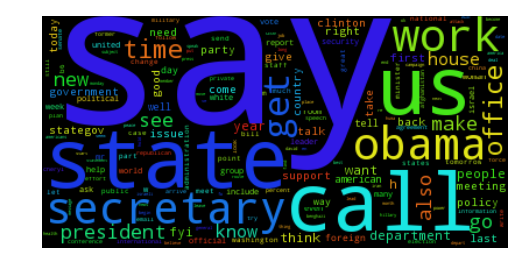

In [17]:
wordcloud = WordCloud().generate_from_frequencies(result)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")

We can see some differences to the word cloud generated automatically by the library. 

With our text pre-processing pipeline "State" is no longer the most dominant word. It is because we use lemmatization and thus, for example, "say", "said", "saying" is aggreagated in one token "say" and consequently sum of the occurencies of "say", "said", "saying" is bigger the the one of "state". The lemmatization is an advantage of our pipeline in comparison wiht the library's pipeline.

Additionally, the token "Will" disappeared altogether. It is becuase, unlike wordcloud library's pipeline, our pipleine considers it a stopword. Whether this is correct or not is up to a discussion as this way we remove not only future tense auxiliary verb, but also noun "will", adjective "willing" etc. Anyway, wordcloud library uses its own stopword list which might not be comprehensive enough and updated to the current standards. We have decided to turst the stopwords list of nltk library instead.

Another difference is that we have normalized the tokens while the worldcloud library did not. We have put all the tokens into lowercase and removed punctuation from them. This way we get lowercase names which might be considered an disadvantage. On the other hand, we get way more accurate frequencies of the words (even for names, as occasionally people do not capitalize names). The removal of punctuation helped us ot get a more accurate frequency of terms such as "U.S." / "US" / "u.s." / "us". 

## Task 2

> Find all the mentions of world countries in the whole corpus, using the `pycountry` utility (*HINT*: remember that
there will be different surface forms for the same country in the text, e.g., Switzerland, switzerland, CH, etc.)
Perform sentiment analysis on every email message using the demo methods in the `nltk.sentiment.util` module. Aggregate 
the polarity information of all the emails by country, and plot a histogram (ordered and colored by polarity level)
that summarizes the perception of the different countries. Repeat the aggregation + plotting steps using different demo
methods from the sentiment analysis module -- can you find substantial differences?

In [26]:
for country in list(pycountry.countries)[:10]:
    print(country)

Country(alpha_2='AW', alpha_3='ABW', name='Aruba', numeric='533')
Country(alpha_2='AF', alpha_3='AFG', name='Afghanistan', numeric='004', official_name='Islamic Republic of Afghanistan')
Country(alpha_2='AO', alpha_3='AGO', name='Angola', numeric='024', official_name='Republic of Angola')
Country(alpha_2='AI', alpha_3='AIA', name='Anguilla', numeric='660')
Country(alpha_2='AX', alpha_3='ALA', name='Åland Islands', numeric='248')
Country(alpha_2='AL', alpha_3='ALB', name='Albania', numeric='008', official_name='Republic of Albania')
Country(alpha_2='AD', alpha_3='AND', name='Andorra', numeric='020', official_name='Principality of Andorra')
Country(alpha_2='AE', alpha_3='ARE', name='United Arab Emirates', numeric='784')
Country(alpha_2='AR', alpha_3='ARG', name='Argentina', numeric='032', official_name='Argentine Republic')
Country(alpha_2='AM', alpha_3='ARM', name='Armenia', numeric='051', official_name='Republic of Armenia')


In [54]:
countries_dict = {country.alpha_2: [country.alpha_2, country.alpha_3, country.name, ] for country in pycountry.countries}

In [48]:
countries_dict

{'AD': ['AD', 'AND', 'Andorra'],
 'AE': ['AE', 'ARE', 'United Arab Emirates'],
 'AF': ['AF', 'AFG', 'Afghanistan'],
 'AG': ['AG', 'ATG', 'Antigua and Barbuda'],
 'AI': ['AI', 'AIA', 'Anguilla'],
 'AL': ['AL', 'ALB', 'Albania'],
 'AM': ['AM', 'ARM', 'Armenia'],
 'AO': ['AO', 'AGO', 'Angola'],
 'AQ': ['AQ', 'ATA', 'Antarctica'],
 'AR': ['AR', 'ARG', 'Argentina'],
 'AS': ['AS', 'ASM', 'American Samoa'],
 'AT': ['AT', 'AUT', 'Austria'],
 'AU': ['AU', 'AUS', 'Australia'],
 'AW': ['AW', 'ABW', 'Aruba'],
 'AX': ['AX', 'ALA', 'Åland Islands'],
 'AZ': ['AZ', 'AZE', 'Azerbaijan'],
 'BA': ['BA', 'BIH', 'Bosnia and Herzegovina'],
 'BB': ['BB', 'BRB', 'Barbados'],
 'BD': ['BD', 'BGD', 'Bangladesh'],
 'BE': ['BE', 'BEL', 'Belgium'],
 'BF': ['BF', 'BFA', 'Burkina Faso'],
 'BG': ['BG', 'BGR', 'Bulgaria'],
 'BH': ['BH', 'BHR', 'Bahrain'],
 'BI': ['BI', 'BDI', 'Burundi'],
 'BJ': ['BJ', 'BEN', 'Benin'],
 'BL': ['BL', 'BLM', 'Saint Barthélemy'],
 'BM': ['BM', 'BMU', 'Bermuda'],
 'BN': ['BN', 'BRN', 'Brune

In [81]:
improved_country_list = {
    'AD': ['AD', 'AND', 'Andorra'],
    'AE': ['AE', 'ARE', 'United Arab Emirates', 'UAE', 'Emirates'],
    'AF': ['AF', 'AFG', 'Afghanistan'],
    'AG': ['AG', 'ATG', 'Antigua and Barbuda', 'Antigua', 'Barbuda'],
    'AI': ['AI', 'AIA', 'Anguilla'],
    'AL': ['AL', 'ALB', 'Albania'],
    'AM': ['', 'ARM', 'Armenia'],
    'AO': ['AO', 'AGO', 'Angola'],
    'AQ': ['AQ', 'ATA', 'Antarctica'],
    'AR': ['AR', 'ARG', 'Argentina'],
    'AS': ['AS', 'ASM', 'American Samoa'],
    'AT': ['AT', 'AUT', 'Austria'],
    'AU': ['AU', 'AUS', 'Australia'],
    'AW': ['AW', 'ABW', 'Aruba'],
    'AX': ['AX', 'ALA', 'Åland Islands', 'Åland', 'Aland'],
    'AZ': ['AZ', 'AZE', 'Azerbaijan'],
    'BA': ['BA', 'BIH', 'Bosnia and Herzegovina', 'Bosnia'],
    'BB': ['BB', 'BRB', 'Barbados'],
    'BD': ['BD', 'BGD', 'Bangladesh'],
    'BE': ['BE', 'BEL', 'Belgium'],
    'BF': ['BF', 'BFA', 'Burkina Faso', 'Burkina'],
    'BG': ['BG', 'BGR', 'Bulgaria'],
    'BH': ['BH', 'BHR', 'Bahrain'],
    'BI': ['BI', 'BDI', 'Burundi'],
    'BJ': ['BJ', 'BEN', 'Benin'],
    'BL': ['BL', 'BLM', 'Saint Barthélemy', 'Barthélemy', 'Barths', 'Barts'],
    'BM': ['BM', 'BMU', 'Bermuda'],
    'BN': ['BN', 'BRN', 'Brunei Darussalam', 'Brunei'],
    'BO': ['BO', 'BOL', 'Bolivia, Plurinational State of', 'Bolivia'],
    'BQ': ['BQ', 'BES', 'Bonaire, Sint Eustatius and Saba', 'Bonaire'],
    'BR': ['BR', 'BRA', 'Brazil'],
    'BS': ['BS', 'BHS', 'Bahamas'],
    'BT': ['BT', 'BTN', 'Bhutan'],
    'BV': ['BV', 'BVT', 'Bouvet Island', 'Bouvet'],
    'BW': ['BW', 'BWA', 'Botswana'],
    'BY': ['BY', 'BLR', 'Belarus'],
    'BZ': ['BZ', 'BLZ', 'Belize'],
    'CA': ['CA', 'CAN', 'Canada'],
    'CC': ['CC', 'CCK', 'Cocos (Keeling) Islands', 'Cocos', 'Keeling'],
    'CD': ['CD', 'COD', 'Congo, The Democratic Republic of the', 'DR Congo', 'DRC', 'DROC', 'Congo-Kinshasa'],
    'CF': ['CF', 'CAF', 'Central African Republic', 'CAR'],
    'CG': ['CG', 'COG', 'Congo'],
    'CH': ['CH', 'CHE', 'Switzerland'],
    'CI': ['CI', 'CIV', "Côte d'Ivoire", 'Ivory Coast', 'Ivory', 'Côte', 'Ivoire', 'Cote'],
    'CK': ['CK', 'COK', 'Cook Islands'],
    'CL': ['CL', 'CHL', 'Chile'],
    'CM': ['CM', 'CMR', 'Cameroon'],
    'CN': ['CN', 'CHN', 'China'],
    'CO': ['CO', 'COL', 'Colombia'],
    'CR': ['CR', 'CRI', 'Costa Rica', 'CostaRica'],
    'CU': ['CU', 'CUB', 'Cuba'],
    'CV': ['CV', 'CPV', 'Cabo Verde', 'Cape Verde', 'CapeVerde'],
    'CW': ['CW', 'CUW', 'Curaçao', 'Curacao'],
    'CX': ['CX', 'CXR', 'Christmas Island'],
    'CY': ['CY', 'CYP', 'Cyprus'],
    'CZ': ['CZ', 'CZE', 'Czechia', 'Czech'],
    'DE': ['DE', 'DEU', 'Germany'],
    'DJ': ['DJ', 'DJI', 'Djibouti'],
    'DK': ['DK', 'DNK', 'Denmark'],
    'DM': ['DM', 'DMA', 'Dominica'],
    'DO': ['DO', 'DOM', 'Dominican Republic'],
    'DZ': ['DZ', 'DZA', 'Algeria'],
    'EC': ['EC', 'ECU', 'Ecuador'],
    'EE': ['EE', 'EST', 'Estonia'],
    'EG': ['EG', 'EGY', 'Egypt'],
    'EH': ['EH', 'ESH', 'Western Sahara', 'Sahara'],
    'ER': ['ER', 'ERI', 'Eritrea'],
    'ES': ['ES', 'ESP', 'Spain'],
    'ET': ['ET', 'ETH', 'Ethiopia'],
    'FI': ['FI', 'FIN', 'Finland'],
    'FJ': ['FJ', 'FJI', 'Fiji'],
    'FK': ['FK', 'FLK', 'Falkland Islands (Malvinas)', 'Falkland', 'Malvinas'],
    'FM': ['FM', 'FSM', 'Micronesia, Federated States of', 'Micronesia'],
    'FO': ['FO', 'FRO', 'Faroe Islands', 'Faroe'],
    'FR': ['FR', 'FRA', 'France'],
    'GA': ['GA', 'GAB', 'Gabon'],
    'GB': ['GB', 'GBR', 'United Kingdom', 'Great Britain', 'Britain'],
    'GD': ['GD', 'GRD', 'Grenada'],
    'GE': ['GE', 'GEO', 'Georgia'],
    'GF': ['GF', 'GUF', 'French Guiana', 'Guiana'],
    'GG': ['GG', 'GGY', 'Guernsey'],
    'GH': ['GH', 'GHA', 'Ghana'],
    'GI': ['GI', 'GIB', 'Gibraltar'],
    'GL': ['GL', 'GRL', 'Greenland'],
    'GM': ['GM', 'GMB', 'Gambia'],
    'GN': ['GN', 'GIN', 'Guinea'],
    'GP': ['GP', 'GLP', 'Guadeloupe'],
    'GQ': ['GQ', 'GNQ', 'Equatorial Guinea'],
    'GR': ['GR', 'GRC', 'Greece'],
    'GS': ['GS', 'SGS', 'South Georgia and the South Sandwich Islands'],
    'GT': ['GT', 'GTM', 'Guatemala'],
    'GU': ['GU', 'GUM', 'Guam'],
    'GW': ['GW', 'GNB', 'Guinea-Bissau'],
    'GY': ['GY', 'GUY', 'Guyana'],
    'HK': ['HK', 'HKG', 'Hong Kong'],
    'HM': ['HM', 'HMD', 'Heard Island and McDonald Islands'],
    'HN': ['HN', 'HND', 'Honduras'],
    'HR': ['HR', 'HRV', 'Croatia'],
    'HT': ['HT', 'HTI', 'Haiti'],
    'HU': ['HU', 'HUN', 'Hungary'],
    'ID': ['ID', 'IDN', 'Indonesia'],
    'IE': ['IE', 'IRL', 'Ireland'],
    'IL': ['IL', 'ISR', 'Israel'],
    'IM': ['IM', 'IMN', 'Isle of Man'],
    'IN': ['IN', 'IND', 'India'],
    'IO': ['IO', 'IOT', 'British Indian Ocean Territory'],
    'IQ': ['IQ', 'IRQ', 'Iraq'],
    'IR': ['IR', 'IRN', 'Iran, Islamic Republic of', 'Iran'],
    'IS': ['IS', 'ISL', 'Iceland'],
    'IT': ['IT', 'ITA', 'Italy'],
    'JE': ['JE', 'JEY', 'Jersey'],
    'JM': ['JM', 'JAM', 'Jamaica'],
    'JO': ['JO', 'JOR', 'Jordan'],
    'JP': ['JP', 'JPN', 'Japan'],
    'KE': ['KE', 'KEN', 'Kenya'],
    'KG': ['KG', 'KGZ', 'Kyrgyzstan'],
    'KH': ['KH', 'KHM', 'Cambodia'],
    'KI': ['KI', 'KIR', 'Kiribati'],
    'KM': ['KM', 'COM', 'Comoros'],
    'KN': ['KN', 'KNA', 'Saint Kitts and Nevis', 'Kitts'],
    'KP': ['KP', 'PRK', "Korea, Democratic People's Republic of", 'North Korea'],
    'KR': ['KR', 'KOR', 'Korea, Republic of', 'South Korea'],
    'KW': ['KW', 'KWT', 'Kuwait'],
    'KY': ['KY', 'CYM', 'Cayman Islands', 'Cayman'],
    'KZ': ['KZ', 'KAZ', 'Kazakhstan'],
    'LA': ['LA', 'LAO', "Lao People's Democratic Republic", 'Laos'],
    'LB': ['LB', 'LBN', 'Lebanon'],
    'LC': ['LC', 'LCA', 'Saint Lucia'],
    'LI': ['LI', 'LIE', 'Liechtenstein'],
    'LK': ['LK', 'LKA', 'Sri Lanka', 'Ceylon'],
    'LR': ['LR', 'LBR', 'Liberia'],
    'LS': ['LS', 'LSO', 'Lesotho'],
    'LT': ['LT', 'LTU', 'Lithuania'],
    'LU': ['LU', 'LUX', 'Luxembourg'],
    'LV': ['LV', 'LVA', 'Latvia'],
    'LY': ['LY', 'LBY', 'Libya'],
    'MA': ['MA', 'MAR', 'Morocco'],
    'MC': ['MC', 'MCO', 'Monaco'],
    'MD': ['MD', 'MDA', 'Moldova, Republic of', 'Moldova'],
    'ME': ['ME', 'MNE', 'Montenegro'],
    'MF': ['MF', 'MAF', 'Saint Martin (French part)'],
    'MG': ['MG', 'MDG', 'Madagascar'],
    'MH': ['MH', 'MHL', 'Marshall Islands'],
    'MK': ['MK', 'MKD', 'Macedonia, Republic of', 'Macedonia'],
    'ML': ['ML', 'MLI', 'Mali'],
    'MM': ['MM', 'MMR', 'Myanmar', 'Burma'],
    'MN': ['MN', 'MNG', 'Mongolia'],
    'MO': ['MO', 'MAC', 'Macao'],
    'MP': ['MP', 'MNP', 'Northern Mariana Islands'],
    'MQ': ['MQ', 'MTQ', 'Martinique'],
    'MR': ['MR', 'MRT', 'Mauritania'],
    'MS': ['MS', 'MSR', 'Montserrat'],
    'MT': ['MT', 'MLT', 'Malta'],
    'MU': ['MU', 'MUS', 'Mauritius'],
    'MV': ['MV', 'MDV', 'Maldives'],
    'MW': ['MW', 'MWI', 'Malawi'],
    'MX': ['MX', 'MEX', 'Mexico'],
    'MY': ['MY', 'MYS', 'Malaysia'],
    'MZ': ['MZ', 'MOZ', 'Mozambique'],
    'NA': ['NA', 'NAM', 'Namibia'],
    'NC': ['NC', 'NCL', 'New Caledonia', 'Caledonia'],
    'NE': ['NE', 'NER', 'Niger'],
    'NF': ['NF', 'NFK', 'Norfolk Island', 'Norfolk'],
    'NG': ['NG', 'NGA', 'Nigeria'],
    'NI': ['NI', 'NIC', 'Nicaragua'],
    'NL': ['NL', 'NLD', 'Netherlands'],
    'NO': ['', 'NOR', 'Norway'],
    'NP': ['NP', 'NPL', 'Nepal'],
    'NR': ['NR', 'NRU', 'Nauru'],
    'NU': ['NU', 'NIU', 'Niue'],
    'NZ': ['NZ', 'NZL', 'New Zealand', 'Zealand'],
    'OM': ['OM', 'OMN', 'Oman'],
    'PA': ['PA', 'PAN', 'Panama'],
    'PE': ['PE', 'PER', 'Peru'],
    'PF': ['PF', 'PYF', 'French Polynesia', 'Polynesia'],
    'PG': ['PG', 'PNG', 'Papua New Guinea', 'Papua'],
    'PH': ['PH', 'PHL', 'Philippines'],
    'PK': ['PK', 'PAK', 'Pakistan'],
    'PL': ['PL', 'POL', 'Poland'],
    'PM': ['', 'SPM', 'Saint Pierre and Miquelon', 'Saint Pierre'],
    'PN': ['PN', 'PCN', 'Pitcairn'],
    'PR': ['PR', 'PRI', 'Puerto Rico', 'Porto Rico', 'PuertoRico', 'PortoRico'],
    'PS': ['', 'PSE', 'Palestine, State of', 'Palestine'],
    'PT': ['PT', 'PRT', 'Portugal'],
    'PW': ['PW', 'PLW', 'Palau'],
    'PY': ['PY', 'PRY', 'Paraguay'],
    'QA': ['QA', 'QAT', 'Qatar'],
    'RE': ['', 'REU', 'Réunion'],
    'RO': ['RO', 'ROU', 'Romania'],
    'RS': ['RS', 'SRB', 'Serbia'],
    'RU': ['RU', 'RUS', 'Russian Federation', 'Russia'],
    'RW': ['RW', 'RWA', 'Rwanda'],
    'SA': ['SA', 'SAU', 'Saudi Arabia', 'Arabia'],
    'SB': ['SB', 'SLB', 'Solomon Islands', 'Solomon'],
    'SC': ['SC', 'SYC', 'Seychelles'],
    'SD': ['SD', 'SDN', 'Sudan'],
    'SE': ['SE', 'SWE', 'Sweden'],
    'SG': ['SG', 'SGP', 'Singapore'],
    'SH': ['SH', 'SHN', 'Saint Helena, Ascension and Tristan da Cunha', 'Saint Helena'],
    'SI': ['SI', 'SVN', 'Slovenia'],
    'SJ': ['SJ', 'SJM', 'Svalbard and Jan Mayen', 'Svalbard'],
    'SK': ['SK', 'SVK', 'Slovakia'],
    'SL': ['SL', 'SLE', 'Sierra Leone'],
    'SM': ['SM', 'SMR', 'San Marino', 'Marino'],
    'SN': ['SN', 'SEN', 'Senegal'],
    'SO': ['SO', 'SOM', 'Somalia'],
    'SR': ['SR', 'SUR', 'Suriname'],
    'SS': ['SS', 'SSD', 'South Sudan'],
    'ST': ['ST', 'STP', 'Sao Tome and Principe', 'Sao Tome'],
    'SV': ['SV', 'SLV', 'El Salvador', 'Salvador'],
    'SX': ['SX', 'SXM', 'Sint Maarten (Dutch part)'],
    'SY': ['SY', 'SYR', 'Syrian Arab Republic', 'Syria'],
    'SZ': ['SZ', 'SWZ', 'Swaziland'],
    'TC': ['TC', 'TCA', 'Turks and Caicos Islands'],
    'TD': ['TD', 'TCD', 'Chad'],
    'TF': ['TF', 'ATF', 'French Southern Territories'],
    'TG': ['TG', 'TGO', 'Togo'],
    'TH': ['TH', 'THA', 'Thailand'],
    'TJ': ['TJ', 'TJK', 'Tajikistan'],
    'TK': ['TK', 'TKL', 'Tokelau'],
    'TL': ['TL', 'TLS', 'Timor-Leste', 'Timor', 'East Timor'],
    'TM': ['TM', 'TKM', 'Turkmenistan'],
    'TN': ['TN', 'TUN', 'Tunisia'],
    'TO': ['', 'TON', 'Tonga'],
    'TR': ['TR', 'TUR', 'Turkey'],
    'TT': ['TT', 'TTO', 'Trinidad and Tobago', 'Trinidad', 'Tobago'],
    'TV': ['TV', 'TUV', 'Tuvalu'],
    'TW': ['TW', 'TWN', 'Taiwan, Province of China', 'Taiwan'],
    'TZ': ['TZ', 'TZA', 'Tanzania, United Republic of', 'Tanzania'],
    'UA': ['UA', 'UKR', 'Ukraine'],
    'UG': ['UG', 'UGA', 'Uganda'],
    'UM': ['UM', 'UMI', 'United States Minor Outlying Islands'],
    'US': ['US', 'USA', 'United States'],
    'UY': ['UY', 'URY', 'Uruguay'],
    'UZ': ['UZ', 'UZB', 'Uzbekistan'],
    'VA': ['VA', 'VAT', 'Holy See (Vatican City State)', 'Vatican'],
    'VC': ['VC', 'VCT', 'Saint Vincent and the Grenadines', 'Saint Vincent'],
    'VE': ['VE', 'VEN', 'Venezuela, Bolivarian Republic of', 'Venezuela'],
    'VG': ['VG', 'VGB', 'Virgin Islands, British'],
    'VI': ['VI', 'VIR', 'Virgin Islands, U.S.'],
    'VN': ['VN', 'VNM', 'Viet Nam', 'Vietnam'],
    'VU': ['VU', 'VUT', 'Vanuatu'],
    'WF': ['WF', 'WLF', 'Wallis and Futuna', 'Wallis'],
    'WS': ['WS', 'WSM', 'Samoa'],
    'YE': ['YE', 'YEM', 'Yemen'],
    'YT': ['', 'MYT', 'Mayotte'],
    'ZA': ['ZA', 'ZAF', 'South Africa'],
    'ZM': ['ZM', 'ZMB', 'Zambia'],
    'ZW': ['ZW', 'ZWE', 'Zimbabwe']
}

PM PS YT TO RE NO AM

In [76]:
df['countries_mentioned'] = np.empty((len(df), 0)).tolist()

def find_countries(row):
    tokens = nltk.word_tokenize(row['ExtractedBodyText'])
    return [country_id for country_id, country_str_list in improved_country_list.items() if any(elem in tokens for elem in country_str_list[0:2] if elem is not '') or any(elem.lower() in row['ExtractedBodyText'].lower() for elem in country_str_list[2:])]

df['countries_mentioned'] = df.apply(find_countries, axis=1)
df['countries_mentioned']

0                                     []
1                               [LY, SY]
2                                     []
3                                     []
4                               [LY, SY]
5                                     []
6                                     []
7                               [LY, SY]
8                                     []
9                                   [LY]
10                                    []
11                                  [LY]
12                                    []
13      [IQ, RU, CN, CF, US, AF, LY, FR]
14                                  [LY]
15                                  [MT]
16                                    []
17                                    []
18                                    []
19                                  [LY]
20                                  [LY]
21                                  [LY]
22                                    []
23                                    []
24              

In [99]:
df['sentiment_liu_hu_lexicon'] = 0

opinion_lexicon_positive = opinion_lexicon.positive()
opinion_lexicon_negative = opinion_lexicon.negative()
def get_token_sentiment(token):
    token = token.lower()
    if token in opinion_lexicon_positive:
        return 1
    elif token in opinion_lexicon_negative:
        return -1
    else:
        return 0

def find_sentiment_liu_hu_lexicon(row):
    if row.astype(str)['countries_mentioned'] == '[]':
        return 0
    print(row.Id)
    tokens = nltk.word_tokenize(row['ExtractedBodyText']) 
    tokens_wo_punctuation = [token for token in tokens if token not in ['.', ',', '!', '?', ':', '-', '&', '<', '>', ';', '"', '@', '(', ')', "''", '``', '—', '--', "'", '[', ']', '•', '%', '...', '-•-', '-^']]
    my_stopwords = stopwords.words('english')
    my_stopwords.extend(["n't", 'pm'])
    tokens_wo_stopwords = [token for token in tokens_wo_punctuation if token.lower() not in my_stopwords]
    tokens_tagged = nltk.pos_tag(tokens_wo_stopwords)
    lemmed_tokens  = [lemmed_token for lemmed_token, wordnet_pos in (lemmatize(token, part_of_speech) for token, part_of_speech in tokens_tagged) if wordnet_pos is not None]
    norm_tokens = [normalize_token(token) for token in lemmed_tokens]
    return sum(get_token_sentiment(token) for token in norm_tokens)

df['sentiment_liu_hu_lexicon'] = df.apply(find_sentiment_liu_hu_lexicon, axis=1)
df['sentiment_liu_hu_lexicon']

2
5
8
10
12
14
15
16
20
21
22
29
32
33
34
37
46
47
52
53
55
56
58
59
61
65
72
73
76
78
81
86
87
88
108
114
119
122
125
127
133
147
152
153
163
169
170
175
188
194
201
203
207
210
212
214
215
220
223
224
225
226
231
235
236
237
240
244
245
256
259
260
264
265
268
270
272
273
276
282
283
285
292
293
296
330
332
333
336
338
345
358
369
380
390
392
393
417
421
429
440
446
467
472
488
497
500
502
507
513
552
576
579
588
608
622
627
638
650
665
677
692
709
713
714
716
720
735
758
766
767
768
770
787
789
798
800
801
809
821
826
839
842
844
863
864
866
870
878
892
894
897
906
915
925
934
935
937
940
943
946
950
952
961
963
968
986
995
1030
1033
1037
1038
1044
1048
1051
1055
1070
1084
1096
1126
1149
1158
1159
1162
1173
1176
1177
1186
1189
1209
1218
1220
1241
1243
1248
1252
1253
1255
1265
1267
1269
1281
1294
1296
1301
1333
1335
1336
1340
1345
1350
1359
1360
1364
1370
1371
1380
1383
1398
1399
1407
1412
1414
1422
1425
1431
1432
1443
1451
1452
1456
1457
1466
1472
1477
1478
1480
1483
1486
1493
1500


0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13      19
14       3
15       5
16       0
17       0
18       0
19       1
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28     -35
29       0
        ..
7915     0
7916     0
7917     0
7918     0
7919     0
7920     0
7921     0
7922     0
7923     0
7924     0
7925     0
7926     0
7927     0
7928     0
7929     0
7930     0
7931     0
7932     0
7933     9
7934     0
7935     0
7936     0
7937     6
7938     4
7939     0
7940     0
7941     0
7942     0
7943     0
7944     0
Name: sentiment_liu_hu_lexicon, dtype: int64

In [121]:
df['sentiment_vader'] = 0

vader_analyzer = SentimentIntensityAnalyzer()
def find_sentiment_vader(row):      
    if row.astype(str)['countries_mentioned'] == '[]':
        return {'compound': 0.0, 'neg': 0.0, 'neu': 0.0, 'pos': 0.0}
    print(row.Id)
    return vader_analyzer.polarity_scores(row['ExtractedBodyText'])

df['sentiment_vader'] = df.apply(find_sentiment_vader, axis=1)
df['sentiment_vader']

2
5
8
10
12
14
15
16
20
21
22
29
32
33
34
37
46
47
52
53
55
56
58
59
61
65
72
73
76
78
81
86
87
88
108
114
119
122
125
127
133
147
152
153
163
169
170
175
188
194
201
203
207
210
212
214
215
220
223
224
225
226
231
235
236
237
240
244
245
256
259
260
264
265
268
270
272
273
276
282
283
285
292
293
296
330
332
333
336
338
345
358
369
380
390
392
393
417
421
429
440
446
467
472
488
497
500
502
507
513
552
576
579
588
608
622
627
638
650
665
677
692
709
713
714
716
720
735
758
766
767
768
770
787
789
798
800
801
809
821
826
839
842
844
863
864
866
870
878
892
894
897
906
915
925
934
935
937
940
943
946
950
952
961
963
968
986
995
1030
1033
1037
1038
1044
1048
1051
1055
1070
1084
1096
1126
1149
1158
1159
1162
1173
1176
1177
1186
1189
1209
1218
1220
1241
1243
1248
1252
1253
1255
1265
1267
1269
1281
1294
1296
1301
1333
1335
1336
1340
1345
1350
1359
1360
1364
1370
1371
1380
1383
1398
1399
1407
1412
1414
1422
1425
1431
1432
1443
1451
1452
1456
1457
1466
1472
1477
1478
1480
1483
1486
1493
1500


0       {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...
1       {'neg': 0.0, 'compound': 0.0, 'pos': 0.0, 'neu...
2       {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...
3       {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...
4       {'neg': 0.0, 'compound': 0.0, 'pos': 0.0, 'neu...
5       {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...
6       {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...
7       {'neg': 0.0, 'compound': 0.0, 'pos': 0.0, 'neu...
8       {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...
9       {'neg': 0.0, 'compound': 0.0, 'pos': 0.0, 'neu...
10      {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...
11      {'neg': 0.0, 'compound': 0.0, 'pos': 0.0, 'neu...
12      {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...
13      {'neg': 0.089, 'compound': 0.9881, 'pos': 0.11...
14      {'neg': 0.026, 'compound': 0.9259, 'pos': 0.18...
15      {'neg': 0.069, 'compound': 0.8869, 'pos': 0.13...
16      {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...
17      {'neg'

In [336]:
df['sentiment_vader_float'] = 0.0
df['sentiment_vader_float'] = df.apply(lambda row: row['sentiment_vader']['compound'], axis=1)
df['sentiment_vader_float'] 

0       0.0000
1       0.0000
2       0.0000
3       0.0000
4       0.0000
5       0.0000
6       0.0000
7       0.0000
8       0.0000
9       0.0000
10      0.0000
11      0.0000
12      0.0000
13      0.9881
14      0.9259
15      0.8869
16      0.0000
17      0.0000
18      0.0000
19     -0.2103
20      0.0000
21      0.0000
22      0.0000
23      0.0000
24      0.0000
25      0.0000
26      0.0000
27      0.0000
28     -0.9960
29      0.0000
         ...  
7915    0.0000
7916    0.0000
7917    0.0000
7918    0.0000
7919    0.0000
7920    0.0000
7921    0.0000
7922    0.0000
7923    0.0000
7924    0.0000
7925    0.0000
7926    0.0000
7927    0.0000
7928    0.0000
7929    0.0000
7930    0.0000
7931    0.0000
7932    0.0000
7933    0.9974
7934    0.0000
7935    0.0000
7936    0.0000
7937    0.9969
7938    0.9884
7939    0.0000
7940    0.0000
7941    0.0000
7942    0.0000
7943    0.0000
7944    0.0000
Name: sentiment_vader_float, dtype: float64

In [337]:
country_emails_dict = {country_id: df.groupby(df['countries_mentioned'].str.join(' ').str.contains(country_id).astype(str)).groups for country_id in improved_country_list}
country_emails_dict = {country_id: groups.get('True', pd.Int64Index([])) for country_id, groups in country_emails_dict.items()}
country_emails_dict = {country_id: email_list for country_id, email_list in country_emails_dict.items() if len(country_emails_dict[country_id]) > 10}
take(10, country_emails_dict.items())

[('KP',
  Int64Index([1242, 1543, 1547, 1565, 1705, 1726, 1736, 2006, 2503, 2740, 2763,
              2999, 3085, 3153, 3377, 3580, 4584, 5235, 5631, 5651, 5733, 5748,
              5758, 5843, 5848, 7756, 7765, 7849],
             dtype='int64')),
 ('PA',
  Int64Index([  64,  107,  808, 1247, 2449, 2647, 2668, 2804, 3468, 3481, 3580,
              3955, 4203, 4412, 4599, 4880, 5170, 5414, 5487, 5748, 5986, 6009,
              6209, 7464, 7521, 7546],
             dtype='int64')),
 ('EG',
  Int64Index([  28,   32,   33,   52,   55,   57,   71,   80,   85,  126,  146,
               214,  235, 1589, 1766, 2449, 2621, 2722, 3109, 3922, 4150, 4506,
              4528, 4531, 4621, 4652, 4670, 4880, 4942, 4970, 5113, 5219, 5413,
              5641, 5842, 5944, 5971, 6057, 6125, 6515, 6695, 6736, 6842, 6887,
              7400],
             dtype='int64')),
 ('IQ',
  Int64Index([  13,   54,  174,  206,  214,  337,  344,  769,  865, 1036, 1047,
              1175, 1547, 1548, 1725, 1902, 245

In [338]:
countries_df = pd.DataFrame.from_dict([country_emails_dict]).transpose()
countries_df.columns = ['email_list', ]
countries_df

,email_list
AD,"Int64Index([ 36, 86, 162, 235, 1499, 1531..."
AE,"Int64Index([146, 211, 267, 3116, 4090, 4217, 4..."
AF,"Int64Index([ 13, 152, 174, 206, 214, 869..."
AM,"Int64Index([ 329, 1431, 1456, 2539, 2625, 2953..."
AO,"Int64Index([332, 357, 391, 1442, 1608, 1610, 2..."
AR,"Int64Index([ 765, 1358, 1958, 3449, 3563, 3564..."
AT,"Int64Index([ 86, 162, 1247, 1531, 1596, 1609..."
AU,"Int64Index([ 146, 1623, 1736, 1737, 2087, 2355..."
BA,"Int64Index([2578, 2680, 3020, 3085, 4634, 4673..."
BR,"Int64Index([1280, 1344, 1358, 1526, 1623, 1680..."


In [339]:
countries_df = countries_df.merge(countries_df.email_list.apply(lambda val: df[['sentiment_liu_hu_lexicon', 'sentiment_vader_float']].loc[val].sum()), left_index=True, right_index=True)
countries_df

,email_list,sentiment_liu_hu_lexicon,sentiment_vader_float
AD,"Int64Index([ 36, 86, 162, 235, 1499, 1531...",197.0,22.1882
AE,"Int64Index([146, 211, 267, 3116, 4090, 4217, 4...",24.0,2.0794
AF,"Int64Index([ 13, 152, 174, 206, 214, 869...",67.0,45.8571
AM,"Int64Index([ 329, 1431, 1456, 2539, 2625, 2953...",-50.0,4.1460
AO,"Int64Index([332, 357, 391, 1442, 1608, 1610, 2...",38.0,5.9331
AR,"Int64Index([ 765, 1358, 1958, 3449, 3563, 3564...",103.0,7.2586
AT,"Int64Index([ 86, 162, 1247, 1531, 1596, 1609...",5.0,14.5588
AU,"Int64Index([ 146, 1623, 1736, 1737, 2087, 2355...",100.0,11.4425
BA,"Int64Index([2578, 2680, 3020, 3085, 4634, 4673...",-52.0,-0.2044
BR,"Int64Index([1280, 1344, 1358, 1526, 1623, 1680...",93.0,15.8099


In [343]:
countries_df['sentiment_vader_float_norm'] = 0.0
countries_df['sentiment_vader_float_norm'] = countries_df.apply(lambda row: row['sentiment_vader_float'] / len(row['email_list']), axis=1)
countries_df['sentiment_vader_float_norm'] 

AD    0.418645
AE    0.189036
AF    0.420707
AM    0.276400
AO    0.423793
AR    0.518471
AT    0.373303
AU    0.520114
BA   -0.018582
BR    0.427295
BY    0.195539
CA    0.365052
CF    0.416442
CG    0.184342
CL    0.380186
CN    0.409170
CO    0.388137
CU    0.225765
DE    0.029796
EE    0.482893
EG    0.344584
ES    0.153286
FM    0.319159
FR    0.050285
GB    0.256607
HN    0.289185
HT    0.422458
ID    0.476933
IE    0.294387
IL    0.357959
        ...   
LY   -0.006737
MA    0.717862
ML    0.398829
MM    0.263939
MS    0.473761
MX    0.340587
NI    0.428871
NO    0.346433
OM    0.334523
PA    0.555781
PK    0.360706
PL   -0.165844
PR    0.179660
PS    0.433193
PW    0.579257
QA    0.342323
RU    0.338081
SA    0.383929
SD    0.282993
SG    0.771832
SO    0.517042
SY    0.217904
TR    0.371195
TV    0.633624
US    0.413800
VA    0.717883
VE    0.583275
VN    0.220356
YE    0.000460
ZA    0.352476
Name: sentiment_vader_float_norm, dtype: float64

[]

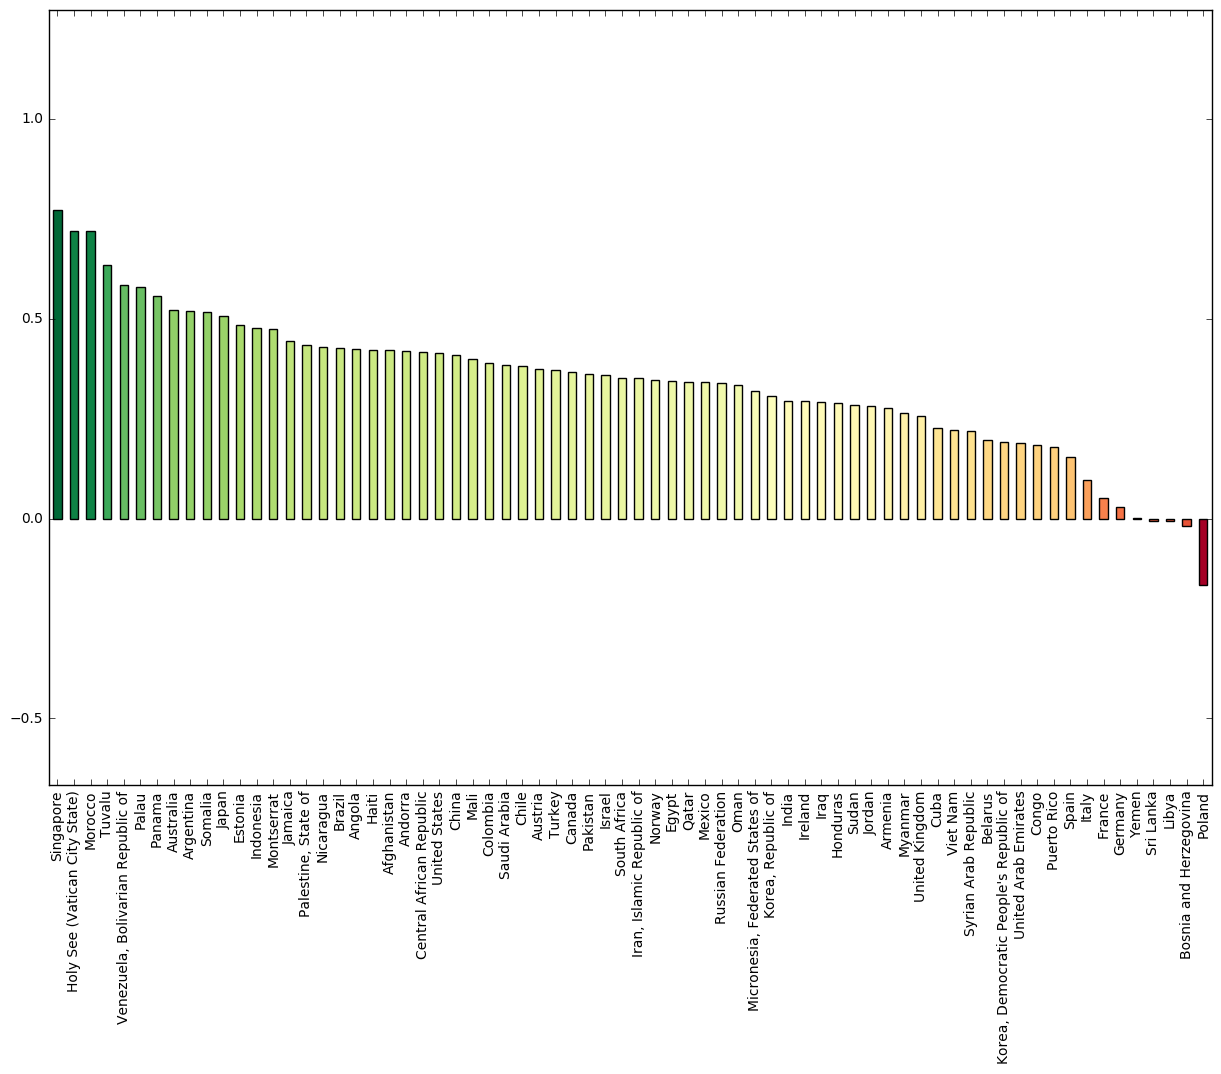

In [348]:
matplotlib.rcParams['figure.figsize'] = (15.0, 10.0)
temp_df = countries_df['sentiment_vader_float_norm'].sort_values(ascending=False, inplace=False)
x_labels = [improved_country_list[index][2] for index in list(temp_df.index)]
cmap = matplotlib.cm.get_cmap('RdYlGn')
# colors = [cmap(np.log2(31 * val + 1) / 5) for val in list((temp_df - temp_df.min()) / (temp_df.max() - temp_df.min()))]
colors = [cmap(val) for val in list((temp_df - temp_df.min()) / (temp_df.max() - temp_df.min()))]
ax = temp_df.plot(kind='bar', color=colors, ylim=(temp_df.min() - 0.5, temp_df.max() + 0.5))
ax.set_xticklabels(x_labels)
ax.plot()

In [346]:
countries_df['sentiment_liu_hu_lexicon_norm'] = 0.0
countries_df['sentiment_liu_hu_lexicon_norm'] = countries_df.apply(lambda row: row['sentiment_liu_hu_lexicon'] / len(row['email_list']), axis=1)
countries_df['sentiment_liu_hu_lexicon_norm'] 

AD     3.716981
AE     2.181818
AF     0.614679
AM    -3.333333
AO     2.714286
AR     7.357143
AT     0.128205
AU     4.545455
BA    -4.727273
BR     2.513514
BY    -1.821429
CA   -12.086957
CF    -1.263819
CG     0.916667
CL     4.500000
CN    -3.505155
CO     4.263158
CU    -4.173913
DE   -20.037037
EE     0.642857
EG    -0.622222
ES    -2.642857
FM     1.012346
FR    -5.777778
GB    -4.555556
HN    -0.925926
HT     2.941860
ID    14.600000
IE    -8.531250
IL    -6.487805
        ...    
LY     2.614286
MA    25.312500
ML    -2.428571
MM    13.722222
MS     1.821429
MX    -2.875000
NI    -1.357143
NO     2.000000
OM    -3.609195
PA     1.730769
PK     0.292135
PL   -10.562500
PR    -4.200000
PS   -12.333333
PW     2.571429
QA     2.181818
RU    -2.941176
SA    -2.928571
SD     5.933333
SG     7.894737
SO     3.000000
SY     9.833333
TR     3.324324
TV    -2.515152
US    -1.533333
VA     6.916667
VE     0.916667
VN   -24.375000
YE     8.000000
ZA    -3.988166
Name: sentiment_liu_hu_l

[]

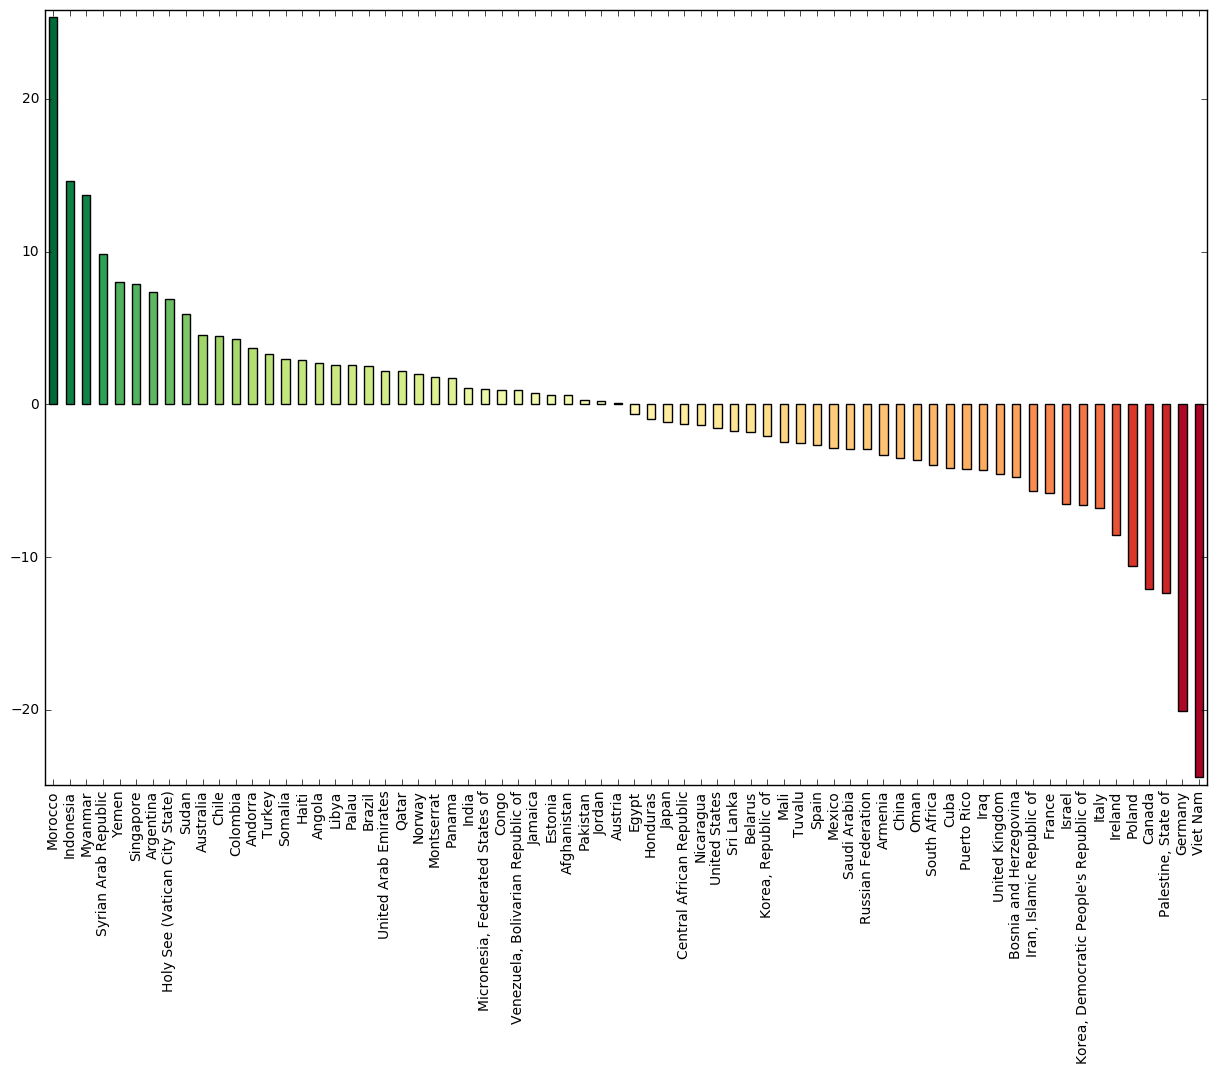

In [347]:
temp_df = countries_df['sentiment_liu_hu_lexicon_norm'].sort_values(ascending=False, inplace=False)
x_labels = [improved_country_list[index][2] for index in list(temp_df.index)]
cmap = matplotlib.cm.get_cmap('RdYlGn')
colors = [cmap(1 / (1 + np.exp(-10 * val))) for val in list(temp_df / 2 / max(np.abs(temp_df.min()), np.abs(temp_df.max())))]
ax = temp_df.plot(kind='bar', color=colors, ylim=(temp_df.min() - 0.5, temp_df.max() + 0.5))
ax.set_xticklabels(x_labels)
ax.plot()

## Task 3

> Using the `models.ldamodel` module from the [gensim library](https://radimrehurek.com/gensim/index.html), run topic
modeling over the corpus. Explore different numbers of topics (varying from 5 to 50), and settle for the parameter which
returns topics that you consider to be meaningful at first sight.

In [ ]:
texts = [[token for token in text if frequency[token] > 1] for text in texts]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
model = models.LdaModel(corpus, id2word=dictionary, num_topics=100)